In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Read data

In [2]:
DOSIMETRIC_DATA_SOURCE = Path(Path.cwd(), 'data.h5')

In [3]:
data_df = pd.DataFrame(pd.read_hdf(DOSIMETRIC_DATA_SOURCE, key='data'))
conditions_df = pd.DataFrame(pd.read_hdf(DOSIMETRIC_DATA_SOURCE, key='conditions'))

In [4]:
dosimetric_metadata = {}
with pd.HDFStore(DOSIMETRIC_DATA_SOURCE, mode='r') as store:
    dosimetric_metadata = store.get_storer('conditions').attrs.metadata
dosimetric_metadata

{'description': 'Dosimetric conditions.',
 'lgad_time_shift_ref': Timedelta('-1 days +22:49:12'),
 'lgad_time_shift_data': Timedelta('-1 days +22:39:02.500000')}

# Analysis

In [5]:
conditions_df[conditions_df.experiment != 'unknown']

,scan_type,driver,no_of_measurements,time_window,step_interval,axis1_start,axis1_stop,axis2_start,axis2_stop,axis3_start,axis3_stop,file_creation_timestamp,stage1_timestamp,stage2_timestamp,stage3_timestamp,stage4_timestamp,experiment,scenario
filename_core,,,,,,,,,,,,,,,,,,
2022-12-13_12_52_42,Skanowanie automatyczne,Ergen,0,0 days 00:00:00.100000,0,0,0,0,0,0,0,2022-12-13 12:52:42,2022-12-13 12:52:42.700,2022-12-13 12:52:44.400,2022-12-13 13:17:09.800,2022-12-13 13:17:09.900,current_scan,0.5nA
2022-12-13_13_23_06,Skanowanie automatyczne,Ergen,0,0 days 00:00:00.100000,0,0,0,0,0,0,0,2022-12-13 13:23:06,2022-12-13 13:23:07.000,2022-12-13 13:23:08.700,2022-12-13 13:49:10.800,2022-12-13 13:49:10.900,current_scan,1nA
2022-12-13_13_56_01,Skanowanie automatyczne,Ergen,0,0 days 00:00:00.100000,0,0,0,0,0,0,0,2022-12-13 13:56:01,2022-12-13 13:56:01.900,2022-12-13 13:56:03.600,2022-12-13 14:17:21.800,2022-12-13 14:17:21.900,current_scan,2nA
2022-12-13_14_43_59,Skanowanie automatyczne,Ergen,0,0 days 00:00:00.100000,0,0,0,0,0,0,0,2022-12-13 14:43:59,2022-12-13 14:43:59.500,2022-12-13 14:44:01.200,2022-12-13 15:39:52.100,2022-12-13 15:39:52.200,current_scan,4nA
2022-12-13_15_45_22,Skanowanie automatyczne,Ergen,0,0 days 00:00:00.100000,0,0,0,0,0,0,0,2022-12-13 15:45:22,2022-12-13 15:45:22.400,2022-12-13 15:45:24.000,2022-12-13 16:03:14.100,2022-12-13 16:03:14.200,current_scan,8nA
2022-12-13_16_14_07,Skanowanie automatyczne,Ergen,0,0 days 00:00:00.100000,0,0,0,0,0,0,0,2022-12-13 16:14:07,2022-12-13 16:14:07.900,2022-12-13 16:14:09.600,2022-12-13 16:27:25.100,2022-12-13 16:27:25.100,current_scan,16nA
2022-12-13_16_36_59,Skanowanie automatyczne,Ergen,0,0 days 00:00:00.100000,0,0,0,0,0,0,0,2022-12-13 16:36:59,2022-12-13 16:36:59.400,2022-12-13 16:37:01.100,2022-12-13 16:38:28.100,2022-12-13 16:38:28.200,current_scan,58nA
2022-12-13_17_40_26,Skanowanie automatyczne,Skaner 3D,56,0 days 00:00:01,5000,57000,377000,225000,225000,0,0,2022-12-13 17:40:26,2022-12-13 17:40:26.500,2022-12-13 17:40:28.300,2022-12-13 18:42:14.700,2022-12-13 18:42:14.700,scan_x,ver1


In [6]:
conditions_df[conditions_df.experiment == 'current_scan'].scenario

filename_core
2022-12-13_12_52_42    0.5nA
2022-12-13_13_23_06      1nA
2022-12-13_13_56_01      2nA
2022-12-13_14_43_59      4nA
2022-12-13_15_45_22      8nA
2022-12-13_16_14_07     16nA
2022-12-13_16_36_59     58nA
Name: scenario, dtype: category
Categories (9, object): ['0.5nA', '16nA', '1nA', '2nA', ..., '58nA', '8nA', 'unknown', 'ver1']

## Current scan

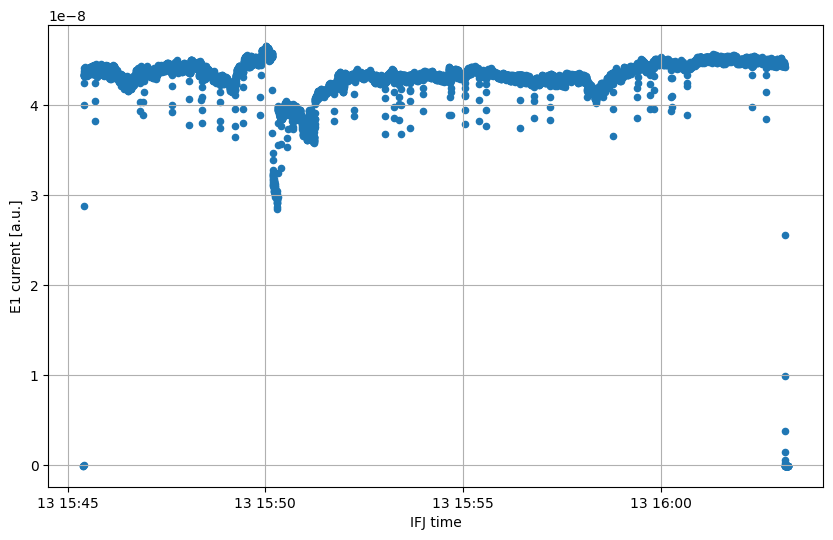

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = data_df[(data_df.experiment == 'current_scan') & (data_df.scenario == '8nA')].plot.scatter(x='timestamp', y='E1', ax=ax)
ax.grid()
ax.set_xlabel('IFJ time')
ax.set_ylabel('E1 current [a.u.]');

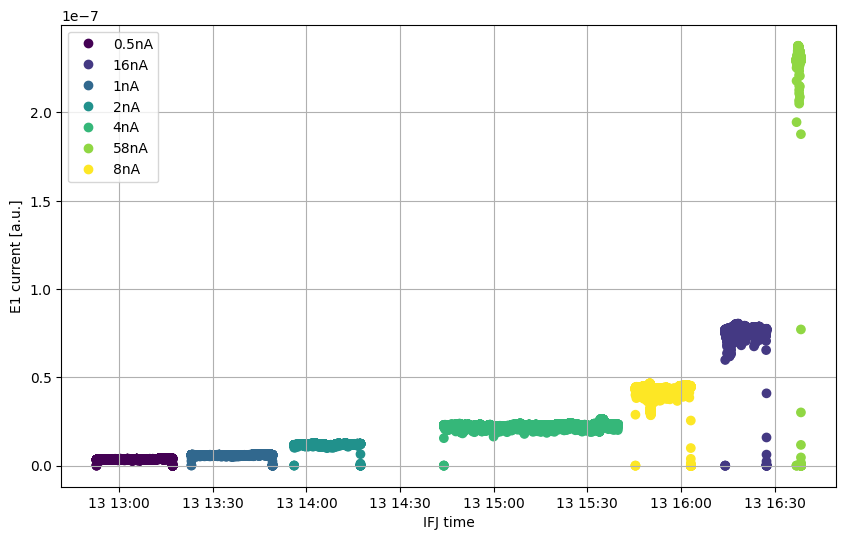

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
# number of colors = number of scenarios
scan_df = data_df[data_df.experiment == 'current_scan']
color_codes = scan_df.scenario.cat.codes
scatter_plot = ax.scatter(x='timestamp', y='E1', data=scan_df, c=color_codes)
ax.legend(scatter_plot.legend_elements()[0], scan_df.scenario.cat.categories)
ax.grid()
ax.set_xlabel('IFJ time')
ax.set_ylabel('E1 current [a.u.]');

## X scan

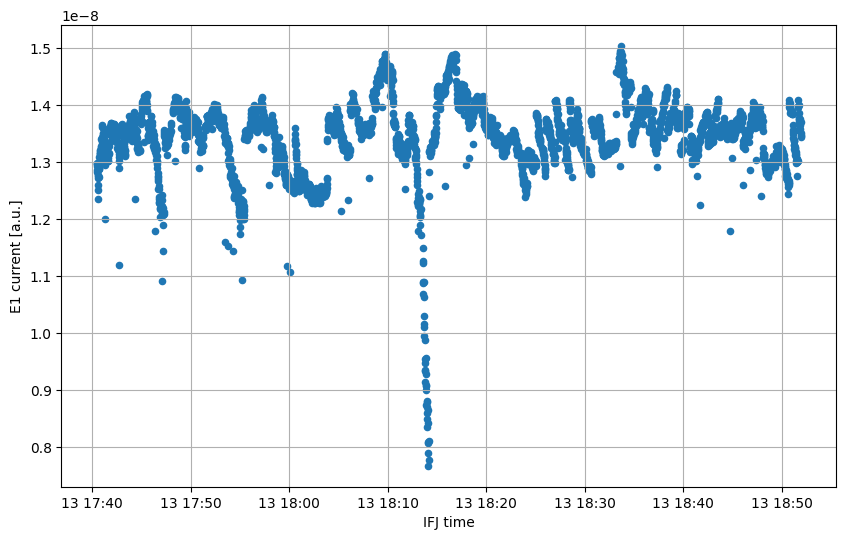

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = data_df[(data_df.experiment == 'scan_x') & (data_df.scenario == 'ver1')].plot.scatter(x='timestamp', y='E1', ax=ax)
ax.grid()
ax.set_xlabel('IFJ time')
ax.set_ylabel('E1 current [a.u.]');

## LGAD time

In [10]:
data_df['lgad_timestamp_data'] = data_df.timestamp + dosimetric_metadata['lgad_time_shift_data']

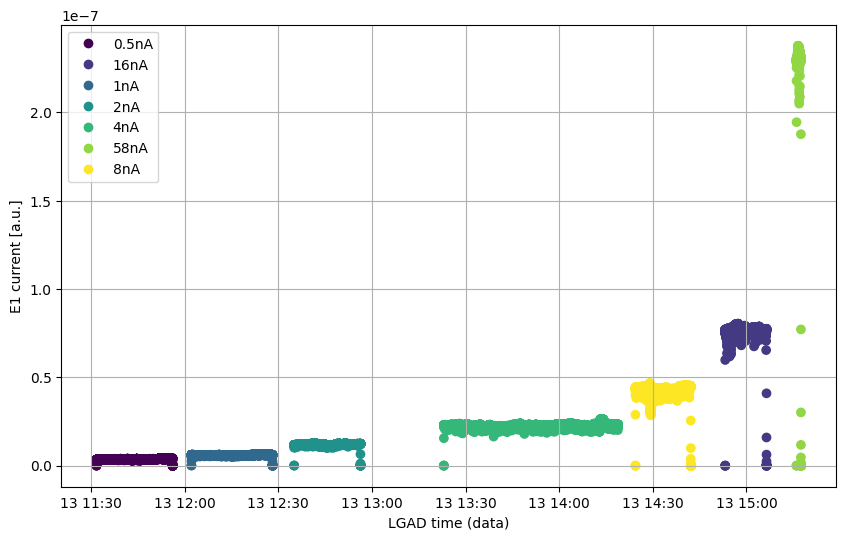

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
# number of colors = number of scenarios
scan_df = data_df[data_df.experiment == 'current_scan']
color_codes = scan_df.scenario.cat.codes
scatter_plot = ax.scatter(x='lgad_timestamp_data', y='E1', data=scan_df, c=color_codes)
ax.legend(scatter_plot.legend_elements()[0], scan_df.scenario.cat.categories)
ax.grid()
ax.set_xlabel('LGAD time (data)')
ax.set_ylabel('E1 current [a.u.]');

# Interpolate E1 current

In [13]:
spl = UnivariateSpline(data_df.lgad_timestamp_data, data_df.E1)

TypeError: The DType <class 'numpy.dtype[timedelta64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[timedelta64]'>, <class 'numpy.dtype[float64]'>)

In [12]:
some_timestamp = pd.Timestamp('2022-12-13 12:15:00')